In [497]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [498]:
train_X = pd.read_csv(r'E:\INCEPTEZ\Training\Basics_python\Heart_disease_grid_search\processed.hungarian.data')

In [499]:
col = ['age',
'sex',
'cp',
'trestbps',
'chol',
'fbs',
'restecg',
'thalach',
'exang',
'oldpeak',
'slope',
'ca',
'thal',
'num']

In [500]:
train_X =pd.read_csv(r'E:\INCEPTEZ\Training\Basics_python\Heart_disease_grid_search\processed.hungarian.data', names=col)

In [501]:
X = train_X.drop(columns='num')
y = train_X['num']

In [502]:
y.value_counts(normalize=True)

0    0.639456
1    0.360544
Name: num, dtype: float64

In [503]:
train_X, test_X , train_y , test_y = train_test_split(X,y, test_size= 0.3, random_state = 12, stratify = y)

In [504]:
train_y.value_counts(normalize=True)

0    0.639024
1    0.360976
Name: num, dtype: float64

In [505]:
test_y.value_counts(normalize=True)

0    0.640449
1    0.359551
Name: num, dtype: float64

In [506]:
train_X.replace({'?':np.NaN}, inplace=True)

In [507]:
train_X.isna().sum()

age           0
sex           0
cp            0
trestbps      1
chol         18
fbs           6
restecg       1
thalach       1
exang         1
oldpeak       0
slope       134
ca          202
thal        187
dtype: int64

In [508]:
# imputing the missing values

In [509]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 227 to 265
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       205 non-null    int64  
 1   sex       205 non-null    int64  
 2   cp        205 non-null    int64  
 3   trestbps  204 non-null    object 
 4   chol      187 non-null    object 
 5   fbs       199 non-null    object 
 6   restecg   204 non-null    object 
 7   thalach   204 non-null    object 
 8   exang     204 non-null    object 
 9   oldpeak   205 non-null    float64
 10  slope     71 non-null     object 
 11  ca        3 non-null      object 
 12  thal      18 non-null     object 
dtypes: float64(1), int64(3), object(9)
memory usage: 22.4+ KB


In [510]:
train_X.replace({np.NaN:'99999'}, inplace =True)

In [511]:
train_X = train_X.apply(lambda x :x.astype('int'))

In [512]:
train_X.replace({99999:np.NaN}, inplace =True)

In [513]:
train_X.mean()

age          47.575610
sex           0.756098
cp            2.917073
trestbps    132.093137
chol        248.518717
fbs           0.055276
restecg       0.210784
thalach     139.357843
exang         0.264706
oldpeak       0.521951
slope         1.887324
ca            0.000000
thal          5.833333
dtype: float64

In [514]:
na_res =train_X.isna().sum()/train_X.shape[0]

### finding percentage of na_values

In [515]:
train_X.isna().sum()/train_X.shape[0]

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.004878
chol        0.087805
fbs         0.029268
restecg     0.004878
thalach     0.004878
exang       0.004878
oldpeak     0.000000
slope       0.653659
ca          0.985366
thal        0.912195
dtype: float64

In [516]:
col_selected = na_res[na_res.apply(lambda x : x<0.6)].index

In [517]:
train_X[col_selected]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
227,39.0,1.0,4.0,110.0,280.0,0.0,0.0,150.0,0.0,0.0
261,52.0,1.0,4.0,112.0,342.0,0.0,1.0,96.0,1.0,1.0
5,32.0,0.0,2.0,105.0,198.0,0.0,0.0,165.0,0.0,0.0
61,43.0,0.0,2.0,120.0,215.0,0.0,1.0,175.0,0.0,0.0
260,51.0,1.0,3.0,135.0,160.0,0.0,0.0,150.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
255,46.0,1.0,1.0,140.0,272.0,1.0,0.0,175.0,0.0,2.0
288,52.0,1.0,4.0,140.0,266.0,0.0,0.0,134.0,1.0,2.0
177,58.0,1.0,4.0,135.0,222.0,0.0,0.0,100.0,0.0,0.0
285,49.0,1.0,4.0,150.0,222.0,0.0,0.0,122.0,0.0,2.0


In [518]:
train_X.fillna(train_X.mean())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
227,39.0,1.0,4.0,110.0,280.0,0.0,0.0,150.0,0.0,0.0,1.887324,0.0,6.000000
261,52.0,1.0,4.0,112.0,342.0,0.0,1.0,96.0,1.0,1.0,2.000000,0.0,5.833333
5,32.0,0.0,2.0,105.0,198.0,0.0,0.0,165.0,0.0,0.0,1.887324,0.0,5.833333
61,43.0,0.0,2.0,120.0,215.0,0.0,1.0,175.0,0.0,0.0,1.887324,0.0,5.833333
260,51.0,1.0,3.0,135.0,160.0,0.0,0.0,150.0,0.0,2.0,2.000000,0.0,5.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,46.0,1.0,1.0,140.0,272.0,1.0,0.0,175.0,0.0,2.0,2.000000,0.0,5.833333
288,52.0,1.0,4.0,140.0,266.0,0.0,0.0,134.0,1.0,2.0,2.000000,0.0,5.833333
177,58.0,1.0,4.0,135.0,222.0,0.0,0.0,100.0,0.0,0.0,1.887324,0.0,5.833333
285,49.0,1.0,4.0,150.0,222.0,0.0,0.0,122.0,0.0,2.0,2.000000,0.0,5.833333


In [519]:
fillna_data = train_X.mean()

In [520]:
train_X.isna().sum()

age           0
sex           0
cp            0
trestbps      1
chol         18
fbs           6
restecg       1
thalach       1
exang         1
oldpeak       0
slope       134
ca          202
thal        187
dtype: int64

In [521]:
train_X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,205.000000,205.000000,205.000000,204.000000,187.000000,199.000000,204.000000,204.000000,204.000000,205.000000,71.000000,3.0,18.000000
mean,47.575610,0.756098,2.917073,132.093137,248.518717,0.055276,0.210784,139.357843,0.264706,0.521951,1.887324,0.0,5.833333
std,8.151771,0.430486,0.979171,17.220567,67.666906,0.229095,0.443543,23.815679,0.442262,0.866453,0.360527,0.0,1.617914
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,90.000000,0.000000,0.000000,1.000000,0.0,3.000000
25%,41.000000,1.000000,2.000000,120.000000,205.500000,0.000000,0.000000,122.000000,0.000000,0.000000,2.000000,0.0,6.000000
50%,48.000000,1.000000,3.000000,130.000000,245.000000,0.000000,0.000000,140.000000,0.000000,0.000000,2.000000,0.0,6.500000
75%,54.000000,1.000000,4.000000,140.000000,277.500000,0.000000,0.000000,155.000000,1.000000,1.000000,2.000000,0.0,7.000000
max,66.000000,1.000000,4.000000,200.000000,529.000000,1.000000,2.000000,190.000000,1.000000,5.000000,3.000000,0.0,7.000000


In [522]:
def preprocess(data , fillna_data =fillna_data, col_selected = col_selected):
    data.replace({'?':np.NaN}, inplace=True)
    data.replace({'-9.0':np.NaN}, inplace=True) 
    data.replace({np.NaN:'99999'}, inplace =True)
    data = data.apply(lambda x :x.astype('int'))
    data.replace({99999:np.NaN}, inplace =True)
    data = data.fillna(fillna_data)
    data= data[col_selected]
    return data

In [523]:
preprocessed_train = preprocess(train_X)
preprocessed_test = preprocess(test_X)

In [524]:
preprocessed_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
227,39.0,1.0,4.0,110.0,280.0,0.0,0.0,150.0,0.0,0.0
261,52.0,1.0,4.0,112.0,342.0,0.0,1.0,96.0,1.0,1.0
5,32.0,0.0,2.0,105.0,198.0,0.0,0.0,165.0,0.0,0.0
61,43.0,0.0,2.0,120.0,215.0,0.0,1.0,175.0,0.0,0.0
260,51.0,1.0,3.0,135.0,160.0,0.0,0.0,150.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
255,46.0,1.0,1.0,140.0,272.0,1.0,0.0,175.0,0.0,2.0
288,52.0,1.0,4.0,140.0,266.0,0.0,0.0,134.0,1.0,2.0
177,58.0,1.0,4.0,135.0,222.0,0.0,0.0,100.0,0.0,0.0
285,49.0,1.0,4.0,150.0,222.0,0.0,0.0,122.0,0.0,2.0


In [554]:
model = RandomForestClassifier(n_estimators=25,max_depth=1,min_samples_leaf=7)
model.fit(preprocessed_train, train_y)

RandomForestClassifier(max_depth=1, min_samples_leaf=7, n_estimators=25)

In [555]:
train_pred = model.predict(preprocessed_train)

In [556]:
 accuracy_score(train_y , train_pred)

0.8439024390243902

In [557]:
test_pred = model.predict(preprocessed_test)

In [558]:
 accuracy_score(test_y , test_pred)

0.7752808988764045

In [530]:
n_estimator =[25,50,75,100,150,200,250]
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,None]
min_sample_leaf = [1,2,3,4,5,6,7,8]

In [549]:
#Model Tuning
train_score=[]
test_score= []
parameter = []
for i in n_estimator:
    for j in max_depth:
        for k in min_sample_leaf:
            model = RandomForestClassifier(n_estimators=i, max_depth=j, min_samples_leaf=k)
            model.fit(preprocessed_train, train_y)
            train_pred = model.predict(preprocessed_train)
            trainscore = accuracy_score(train_y , train_pred)
            train_score.append(trainscore)
            test_pred = model.predict(preprocessed_test)
            testscore = accuracy_score(test_y , test_pred)
            test_score.append(testscore)
            para = str(i)+' '+str(j)+' '+str(k)
            parameter.append(para)

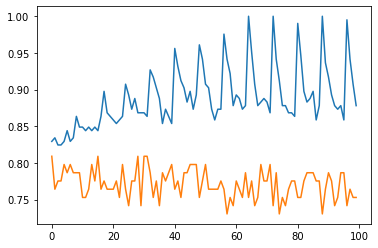

In [533]:
plt.plot(train_score[:100])
plt.plot(test_score[:100])

In [550]:
max(test_score)

0.8202247191011236

In [551]:
test_score.index(0.8202247191011236)

6

In [553]:
parameter[6]

'25 1 7'

In [537]:
Best_score =max(test_score)

In [538]:
n_estimator =25
max_depth = 10
min_sample_leaf = 3

In [539]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [540]:
n_estimator =[25,50,75,100,150,200,250]
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,None]
min_sample_leaf = [1,2,3,4,5,6,7,8]

In [541]:
parameters = {'n_estimators':[25,50,75,100,150,200,250], 'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,None], 'min_samples_leaf':[1,2,3,4,5,6,7,8]}

In [542]:
parameters

{'n_estimators': [25, 50, 75, 100, 150, 200, 250],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, None],
 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8]}

In [543]:
# model =RandomForestClassifier()
# gridsearch = GridSearchCV(model, parameters, verbose =1, scoring='accuracy')
# gridsearch.fit(preprocessed_train, train_y)

Fitting 5 folds for each of 728 candidates, totalling 3640 fits


KeyboardInterrupt: 

In [ ]:
gridsearch.best_estimator_

In [ ]:
train_pred = gridsearch.predict(preprocessed_train)
accuracy_score(train_y , train_pred)

In [ ]:
test_pred = gridsearch.predict(preprocessed_test)
accuracy_score(test_y , test_pred)

In [544]:
%%time
model =RandomForestClassifier()
randomsearch = RandomizedSearchCV(model, parameters, cv =10, verbose =1, scoring='accuracy')
randomsearch.fit(preprocessed_train, train_y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Wall time: 15.9 s


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8],
                                        'n_estimators': [25, 50, 75, 100, 150,
                                                         200, 250]},
                   scoring='accuracy', verbose=1)

In [545]:
randomsearch.best_estimator_

RandomForestClassifier(max_depth=12, min_samples_leaf=3, n_estimators=75)

In [546]:
train_pred = randomsearch.predict(preprocessed_train)
accuracy_score(train_y , train_pred)

0.926829268292683

In [547]:
test_pred = randomsearch.predict(preprocessed_test)
accuracy_score(test_y , test_pred)

0.7640449438202247